In [1]:
import numpy as np
import subprocess
import h5py #train_x train_y test_x test_y
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import colorcet as cc
import math
import torch

from matplotlib.cm import get_cmap
from dataset import form_dataset
from model import create_model
from train import train_model
from test import (test_model, get_conf_matrix)
from cam import find_cam

In [3]:
def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass

In [2]:
# Download datasets; load train, validation and test datasets
runcmd("wget -P ../data https://www.dropbox.com/s/s8ld51r5ekdybs2/dataset_jrm_1971_seismic_images?dl=0",\
       verbose = True)
trainloader, validationloader, testloader = \
    form_dataset("../data/dataset_jrm_1971_seismic_images", 1971)

In [3]:
# Create VIT model, move it to Cuda, 
model = create_model()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device);

# Unfreeze only the last classification layer
for param in model.parameters(): #freeze model
    param.requires_grad = False
for param in model.head.parameters(): #Unfreeze only classification head
    param.requires_grad = True      

In [4]:
# (Traininng Stage 1) Train the model by freezing the initial feature extracting layers
model, train_loss, val_loss, train_acc, val_acc = train_model(model,trainloader, validationloader, device, num_epochs= 30, lr= 0.0005, step_size = 1, gamma = 0.99)


Epoch 0/29
----------


100%|█████████████████████████████████████████| 158/158 [00:06<00:00, 26.28it/s]


train Loss: 0.6955 Acc: 0.5408


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.16it/s]


val Loss: 0.6359 Acc: 0.7152

Epoch 1/29
----------


100%|█████████████████████████████████████████| 158/158 [00:04<00:00, 31.76it/s]


train Loss: 0.6292 Acc: 0.6661


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.38it/s]


val Loss: 0.5942 Acc: 0.7785

Epoch 2/29
----------


100%|█████████████████████████████████████████| 158/158 [00:04<00:00, 31.91it/s]


train Loss: 0.5973 Acc: 0.7320


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.21it/s]


val Loss: 0.5673 Acc: 0.8038

Epoch 3/29
----------


100%|█████████████████████████████████████████| 158/158 [00:04<00:00, 31.97it/s]


train Loss: 0.5746 Acc: 0.7629


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.24it/s]


val Loss: 0.5512 Acc: 0.8006

Epoch 4/29
----------


100%|█████████████████████████████████████████| 158/158 [00:04<00:00, 31.94it/s]


train Loss: 0.5678 Acc: 0.7597


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.24it/s]


val Loss: 0.5396 Acc: 0.8070

Epoch 5/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 31.46it/s]


train Loss: 0.5584 Acc: 0.7645


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.09it/s]


val Loss: 0.5318 Acc: 0.8006

Epoch 6/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 31.45it/s]


train Loss: 0.5495 Acc: 0.7780


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.09it/s]


val Loss: 0.5258 Acc: 0.8101

Epoch 7/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 31.25it/s]


train Loss: 0.5449 Acc: 0.7740


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 31.92it/s]


val Loss: 0.5238 Acc: 0.8101

Epoch 8/29
----------


100%|█████████████████████████████████████████| 158/158 [00:04<00:00, 31.79it/s]


train Loss: 0.5394 Acc: 0.7803


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.03it/s]


val Loss: 0.5166 Acc: 0.8133

Epoch 9/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 31.51it/s]


train Loss: 0.5383 Acc: 0.7772


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.41it/s]


val Loss: 0.5138 Acc: 0.8165

Epoch 10/29
----------


100%|█████████████████████████████████████████| 158/158 [00:04<00:00, 31.98it/s]


train Loss: 0.5297 Acc: 0.7930


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 31.96it/s]


val Loss: 0.5098 Acc: 0.8228

Epoch 11/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 31.06it/s]


train Loss: 0.5278 Acc: 0.7954


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 31.38it/s]


val Loss: 0.5083 Acc: 0.8101

Epoch 12/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 30.20it/s]


train Loss: 0.5254 Acc: 0.7994


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.73it/s]


val Loss: 0.5077 Acc: 0.8070

Epoch 13/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 29.96it/s]


train Loss: 0.5194 Acc: 0.8025


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 30.64it/s]


val Loss: 0.5067 Acc: 0.8070

Epoch 14/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 30.11it/s]


train Loss: 0.5193 Acc: 0.8097


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 30.05it/s]


val Loss: 0.5028 Acc: 0.8038

Epoch 15/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 30.03it/s]


train Loss: 0.5188 Acc: 0.8121


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.72it/s]


val Loss: 0.5014 Acc: 0.8038

Epoch 16/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 29.58it/s]


train Loss: 0.5165 Acc: 0.8017


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 30.27it/s]


val Loss: 0.4990 Acc: 0.8133

Epoch 17/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.42it/s]


train Loss: 0.5137 Acc: 0.8176


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.06it/s]


val Loss: 0.4975 Acc: 0.8133

Epoch 18/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 29.28it/s]


train Loss: 0.5098 Acc: 0.8224


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.34it/s]


val Loss: 0.4982 Acc: 0.8196

Epoch 19/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 29.65it/s]


train Loss: 0.5166 Acc: 0.8057


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.58it/s]


val Loss: 0.4982 Acc: 0.8101

Epoch 20/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.90it/s]


train Loss: 0.5124 Acc: 0.8105


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.97it/s]


val Loss: 0.4976 Acc: 0.8070

Epoch 21/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 29.20it/s]


train Loss: 0.5077 Acc: 0.8025


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.74it/s]


val Loss: 0.4989 Acc: 0.8101

Epoch 22/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 29.61it/s]


train Loss: 0.5103 Acc: 0.8160


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.73it/s]


val Loss: 0.4957 Acc: 0.8165

Epoch 23/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.87it/s]


train Loss: 0.5096 Acc: 0.8121


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.42it/s]


val Loss: 0.4938 Acc: 0.8101

Epoch 24/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.65it/s]


train Loss: 0.5139 Acc: 0.8089


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.88it/s]


val Loss: 0.4987 Acc: 0.8165

Epoch 25/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.85it/s]


train Loss: 0.5086 Acc: 0.8136


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.62it/s]


val Loss: 0.4961 Acc: 0.8196

Epoch 26/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.11it/s]


train Loss: 0.5085 Acc: 0.8121


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.24it/s]


val Loss: 0.4942 Acc: 0.8165

Epoch 27/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.99it/s]


train Loss: 0.5045 Acc: 0.8192


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.41it/s]


val Loss: 0.4908 Acc: 0.8165

Epoch 28/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.75it/s]


train Loss: 0.5062 Acc: 0.8160


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.52it/s]


val Loss: 0.4901 Acc: 0.8165

Epoch 29/29
----------


100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 27.64it/s]


train Loss: 0.5069 Acc: 0.8121


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.52it/s]

val Loss: 0.4933 Acc: 0.8259

Training complete in 3m 18s
Best Val Acc: 0.0000


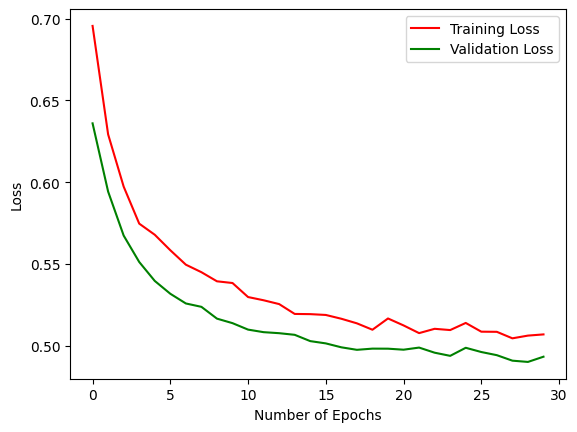

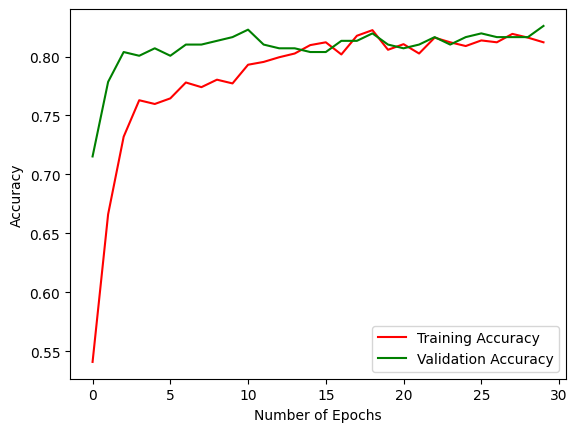

In [5]:
# Plot loss graphs
plt.plot(train_loss, 'r')
plt.plot(val_loss, 'g')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"])
plt.show()

plt.plot(train_acc, 'r')
plt.plot(val_acc, 'g')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

In [6]:
# For finetuning unfreeze all layer parameters
for param in model.parameters(): 
    param.requires_grad = True

In [7]:
# (Training Stage 2) Train the model for several epochs by unfreezing all parameters
model, train_loss, val_loss, train_acc, val_acc = train_model(model,trainloader, validationloader, device, num_epochs= 15, lr= 0.0005, step_size = 1, gamma = 0.99)

Epoch 0/14
----------


100%|█████████████████████████████████████████| 158/158 [00:16<00:00,  9.73it/s]


train Loss: 0.5093 Acc: 0.8025


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 32.16it/s]


val Loss: 0.4886 Acc: 0.8165

Epoch 1/14
----------


100%|█████████████████████████████████████████| 158/158 [00:16<00:00,  9.77it/s]


train Loss: 0.5045 Acc: 0.8224


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 30.46it/s]


val Loss: 0.4879 Acc: 0.8165

Epoch 2/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  9.25it/s]


train Loss: 0.5003 Acc: 0.8136


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 29.34it/s]


val Loss: 0.4883 Acc: 0.8165

Epoch 3/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  9.05it/s]


train Loss: 0.4979 Acc: 0.8160


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.80it/s]


val Loss: 0.4877 Acc: 0.8228

Epoch 4/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.87it/s]


train Loss: 0.4972 Acc: 0.8168


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.70it/s]


val Loss: 0.4860 Acc: 0.8196

Epoch 5/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.85it/s]


train Loss: 0.5025 Acc: 0.8105


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.88it/s]


val Loss: 0.4897 Acc: 0.8259

Epoch 6/14
----------


100%|█████████████████████████████████████████| 158/158 [00:18<00:00,  8.78it/s]


train Loss: 0.4993 Acc: 0.8136


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.79it/s]


val Loss: 0.4864 Acc: 0.8196

Epoch 7/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.87it/s]


train Loss: 0.4984 Acc: 0.8121


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.66it/s]


val Loss: 0.4885 Acc: 0.8291

Epoch 8/14
----------


100%|█████████████████████████████████████████| 158/158 [00:18<00:00,  8.76it/s]


train Loss: 0.4989 Acc: 0.8089


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.93it/s]


val Loss: 0.4878 Acc: 0.8259

Epoch 9/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.85it/s]


train Loss: 0.4965 Acc: 0.8255


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.63it/s]


val Loss: 0.4869 Acc: 0.8259

Epoch 10/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.90it/s]


train Loss: 0.4958 Acc: 0.8160


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.93it/s]


val Loss: 0.4856 Acc: 0.8228

Epoch 11/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.92it/s]


train Loss: 0.4972 Acc: 0.8176


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.68it/s]


val Loss: 0.4882 Acc: 0.8259

Epoch 12/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.98it/s]


train Loss: 0.4956 Acc: 0.8136


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.73it/s]


val Loss: 0.4875 Acc: 0.8228

Epoch 13/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.89it/s]


train Loss: 0.4941 Acc: 0.8247


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 27.64it/s]


val Loss: 0.4855 Acc: 0.8259

Epoch 14/14
----------


100%|█████████████████████████████████████████| 158/158 [00:17<00:00,  8.94it/s]


train Loss: 0.4958 Acc: 0.8192


100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 28.84it/s]

val Loss: 0.4877 Acc: 0.8323

Training complete in 4m 44s
Best Val Acc: 0.0000


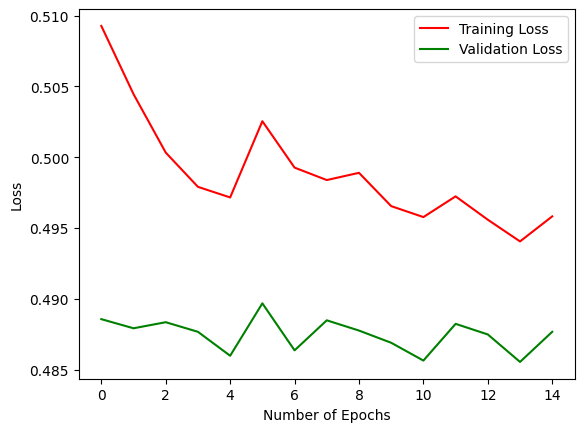

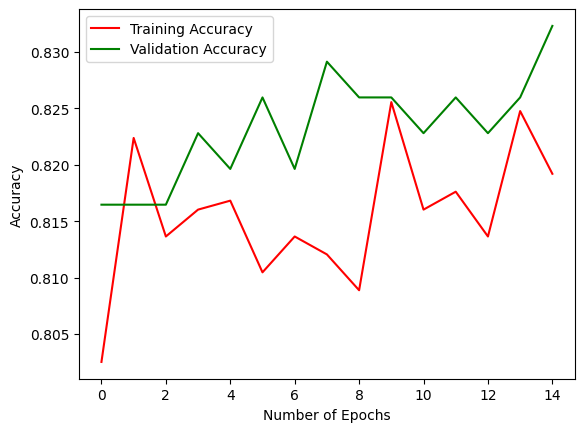

In [8]:
# Plot loss graphs
plt.plot(train_loss, 'r')
plt.plot(val_loss, 'g')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"])
plt.show()

plt.plot(train_acc, 'r')
plt.plot(val_acc, 'g')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

In [9]:
# Print test performance of model
testing_loss_vit, testing_acc_vit, label_list_vit, pred_list_vit, output_list_vit = test_model(model, testloader)
print('VIT model testing loss: ',testing_loss_vit , ', VIT model testing accuracy: ', testing_acc_vit)

Loss: 0.4795 Acc: 0.8350
VIT model testing loss:  0.47954430480293814 , VIT model testing accuracy:  0.8350253807106599


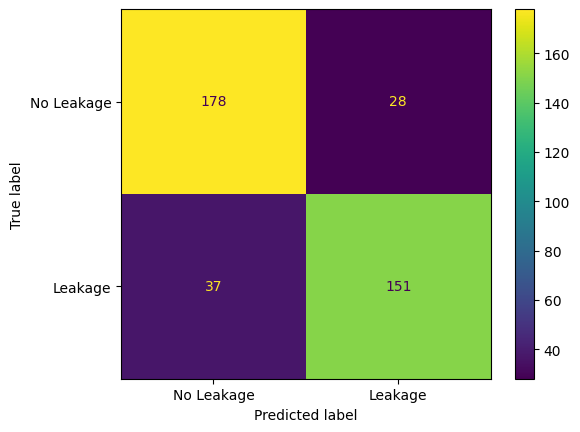

In [10]:
# Plot the confusion matrix
conf_matrix_vit, cm_display = get_conf_matrix(label_list_vit, pred_list_vit)
cm_display.plot(cmap = "viridis")
plt.show()

In [11]:
# Form a list of images to be used to see CAM results
it = iter(testloader)
test_image_list = []
test_label_list = [] 

size =15
for i in range(size*size):
    test_image, test_label = next(it)
    test_image_list.append(test_image)
    test_label_list.append(test_label)

100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 14.73it/s]


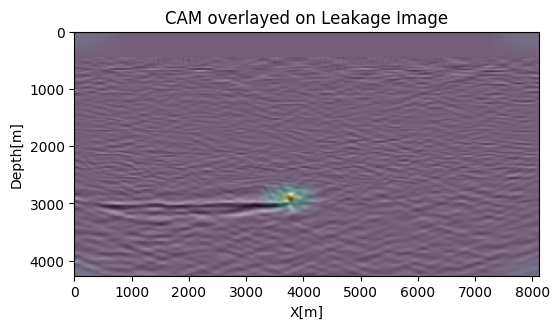

In [12]:
# Plot the seismic image and overlay CAM heatmap on top of it
# This CAM example is for a leakage image
input_image_tensor = test_image_list[33]
plt.figure(figsize=(6, 6))
plt.imshow(input_image_tensor[0,0,:,:], cmap=get_cmap("cet_CET_L1"),  extent=[0, 12.5*650, 12.5*341, 0])
plt.imshow(find_cam(model,input_image_tensor, cam_method = "ScoreCAM")[0], alpha = 0.3,  extent=[0, 12.5*650, 12.5*341, 0])
plt.xlabel('X[m]')
plt.ylabel('Depth[m]') 
plt.title('CAM overlayed on Leakage Image')
plt.show()

100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 14.77it/s]


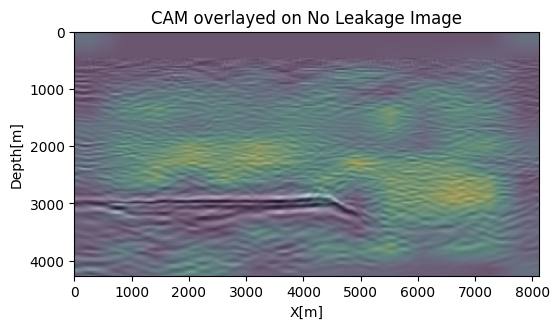

In [13]:
# This CAM example is for a no leakage image
input_image_tensor = test_image_list[218]
plt.figure(figsize=(6, 6))
plt.imshow(input_image_tensor[0,0,:,:], cmap=get_cmap("cet_CET_L1"),  extent=[0, 12.5*650, 12.5*341, 0])
plt.imshow(find_cam(model,input_image_tensor, cam_method = "ScoreCAM")[0], alpha = 0.3,  extent=[0, 12.5*650, 12.5*341, 0])
plt.xlabel('X[m]')
plt.ylabel('Depth[m]') 
plt.title('CAM overlayed on No Leakage Image')
plt.show()